<a href="https://colab.research.google.com/github/katherymbr/TP3_Fractales-ecuacion_logistica/blob/main/TP3_Fractales_ecuacion_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

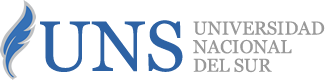

MODELOS FRACTALES Y SISTEMAS CAÓTICOS
---
PRACTICO No. 3.




---


**Ecuación Logística**
---


```
Estudiante: Katherym Bambague Ruíz
```

*   Implementar las tres “vistas” de la ecuación logística
(1. trayectorias,  2. diagrama de fases,  3. diagrama de estabilidad) con una
cantidad “razonable” de accionabilidad.

*   (Optativo): Hacer el mismo experimento pero con un SD alternativo de
propiedades similares (mismos valores y parámetros pero otra “forma”):


# Importo las librerias

In [380]:
import numpy as np
import math
import matplotlib.pyplot as plt
from random import randint
import ipywidgets as widgets

Para las ecuaciones alfa = r

# Ecuacion a evaluar=  (eq1)

In [381]:
# Ecuación 1:  Ecuacioón Logistica Xi+1 = rXi(1-Xi)
def eq1(r, xi):
    #print("ECUACIÓN 1 (eq1)= ",  "r * xi * (1 - xi)")
    return r * xi * (1 - xi)


# Ecuacion a evaluar=  (eq2)

In [382]:
# Ecuacion 2: r/4*sen(pi.Xi)
def eq2(r,xi):
  #print("ECUACIÓN 2 (eq2)= ",  "r/4*sen(pi.Xi)")
  return r/4*math.sin(np.pi*xi)

# Ecuacion a evaluar=  (eq3)

In [383]:
# Ecuacion 3: r/2*Xi --> 0 <= Xi <= 0.5;  r/2*Xi --> 0.5 < Xi <= 1
def eq3(r,xi):
  if (xi>=0 and xi<=0.5):
    out= r/2*xi
    #print("tTramo 1: xi debe estar entre 0 - 0.5")
    #print("ECUACIÓN 3 (eq3)= ",  "Tramo 1: r/2*Xi --> 0 <= Xi <= 0.5")
  if (xi>0.5 and xi<=1):
    out = r/2*(1-xi)
    #print("Tramo 2: xi debe estar entre 0.51 - 1")
    #print("ECUACIÓN 3 (eq3)= ",  "Tramo 2 : r/2*Xi --> 0.5 < Xi <= 1")
  return out

# 1.Diagrama de estabilidad

In [384]:
#Esta Función itera la ecuación seleccionada (eq1, eq2, eq3) y obtiene los valores 
#para un un valor de Xi, que se da inicialmente, un r y numero de iteracciones dado. 
#Al iterarse para todo el rango de r se obtiene el digrama de estabilidad 

def iter1(n, xi, r, eq):

  for _ in range(n):
    xi_plus = eq(r,xi)
    xi = xi_plus
  return xi_plus

In [385]:
eciacion1= eq3(4, 0.51)


# 2. Diagrama de trayectoria

In [386]:
#Esta Función itera la ecuación seleccionada (eq1, eq2, eq3) y obtiene los valores siguientes
#para un valor definido Xi, que se da inicialmente y un r, para el rango de iteraciones dado. 
# Aqui se Genera una lista que permite trazar la trayectoria 

def iter2(n, xi, r, eq):

  xi_list = [(xi, 0)]
  for _ in range(n):
    xi_plus = eq(r,xi)
    xi_list.append((xi, xi_plus))
    xi_list.append((xi_plus, xi_plus))
    xi_plus2 = eq(r,xi_plus)
    xi_list.append((xi_plus, xi_plus2))
    xi = xi_plus
  out = np.array(xi_list)
  return out[:,0], out[:,1]

# 3. Diagrama de fase

In [387]:
#Función que itera la ecuación seleccionada (eq1, eq2, eq3) y obtiene los valores
#para un un valor r definido, mapeando el rango de Xi entre 0 y 1 
#para una división dada por el valor de iteraciones n definido

def iter3(r, n, eq):

    x_vals = np.linspace(0, 1, n)
    y_vals = [eq(r,x) for x in x_vals]
    return x_vals, y_vals

# Función que asigna la ecuación al titulo de la grafica

In [388]:
def titulo(eq):

  if eq == eq1:
    ecuacion = r'$Xi+1=r \cdot Xi(1-Xi)$'
  if eq == eq2:
    ecuacion = r'$\frac{r}{4} \cdot \sin(\pi \cdot xi)$'
  if eq == eq3:
    ecuacion = r'$<\frac{r}{2} \cdot xi> <\frac{r}{2} \cdot (1-xi)>$'
  return ecuacion

#  Vista1:   Función que plotea el diagrama de trayectorias

In [389]:
def diagrama_trayectorias(idx=100, r=0, Xi=0, eq=eq1):

    y,_ = iter2(idx, Xi, r, eq=eq)
    y = y[1::3]
    t = np.arange(len(y))
    y = y[:idx]
    t = t[:idx]
    ecuacion = titulo(eq)

    plt.figure(figsize=(15, 10), dpi=70)
    plt.plot(t, y, c='slateblue',linewidth=1)
    plt.scatter(t,y, s=5, c='red')
    plt.title("Diagrama. Trayectorias:  "+ ecuacion+" [$r =$ {:4.2f}, ".format(r)+
              "$Xi =$ {:4.3f}]".format(Xi), fontsize=20)
    plt.xlim((-5,idx))
    plt.ylim((0,1))
    plt.grid(True)
    


# Vista2: Función que plotea el diagrama de fases

In [390]:
def diagrama_fases(r=1, xi=0.5, iter=1000, seg_n=100, eq=eq1):

    x_seg, y_seg = iter2(r=r, xi=xi, n=seg_n, eq=eq)
    x_fun, y_fun = iter3(r=r, n=iter,eq=eq)
    ecuacion = titulo(eq)
    
    plt.figure(figsize=(10, 10), dpi=100)
    plt.plot((0,1), (0,1), c='slateblue',linewidth=1)
    plt.plot(x_fun, y_fun, linewidth=2, c='darkslateblue')
    plt.scatter(x_seg, y_seg, c='red', s=20)
    plt.plot(x_seg, y_seg,linewidth=1, c='green')
    plt.title(" Diagrama. Fases:  "+ str(ecuacion)+"[$r =$ {:4.2f}, ".format(r)+
              "$Xi =$ {:4.3f}]".format(xi), fontsize=15)
    plt.xlim((0,1))
    plt.ylim((0,1))

#  Vista3: Función que plotea el digrama de estabilidad

In [391]:
def diagrama_estabilidad(r, Xi, d=5000, eq=eq1):

  range_r = list(np.linspace(0, r, d)) # se genera una lista de valores de r entre 0 y un valor r ingresado. para un numero de divisiones dado
  log = [iter1(randint(100, 200), Xi, p_r, eq=eq) for p_r in range_r]
  ecuacion = titulo(eq)

  plt.figure(figsize=(15, 10), dpi=70)
  plt.scatter(range_r, log, s=1, c='darkslateblue')
  plt.title("Diagrama. Estabilidad:  "+ str(ecuacion), fontsize=20)
  plt.ylim((0,1))
  plt.xlim((0,4))
  plt.grid(True)

# EJECUCIÓN

(eq2)-r/4*sen(pi.Xi)


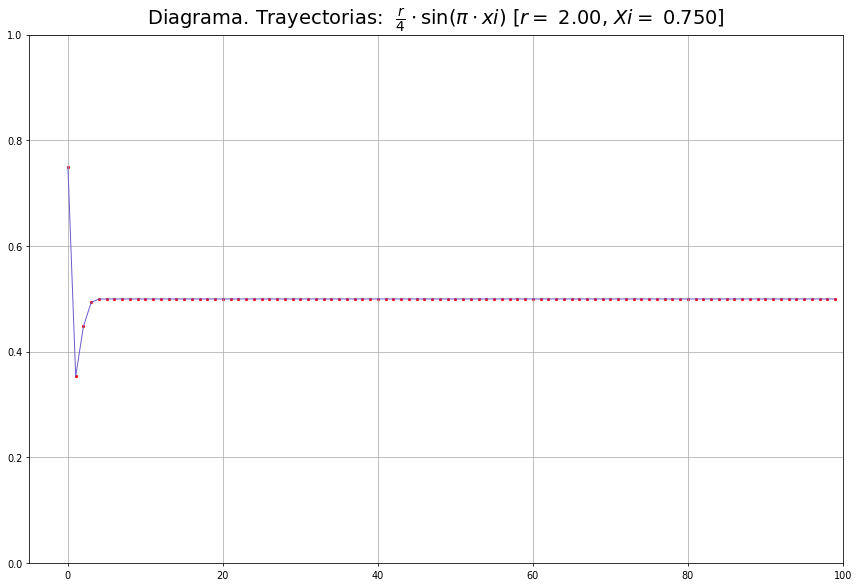

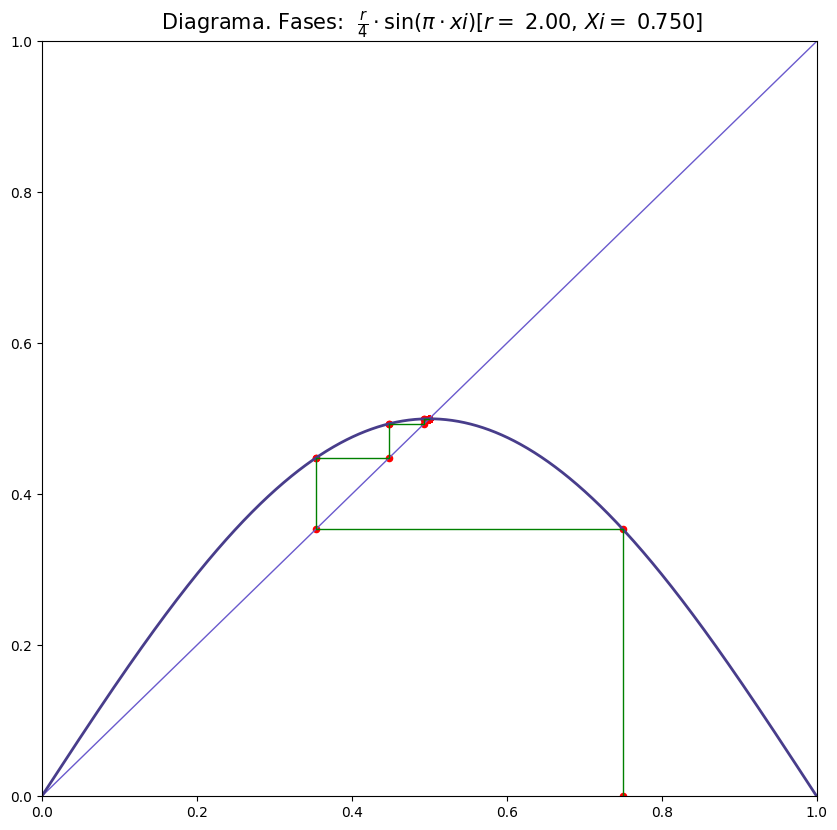

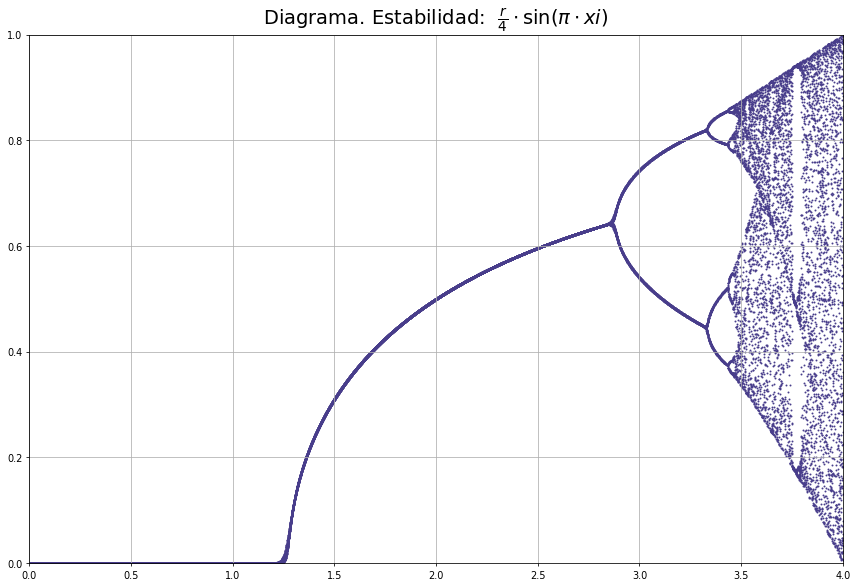

In [392]:
#@title Seleccione los parametros r , xi y la ecuación (eq_v) . { run: "auto" }
valor_r = 2 #@param {type:"slider", min:0, max:4.2, step:0.1}
valor_Xi = 0.75 #@param {type:"slider", min:0, max:1, step:0.05}


#@title RGB_  Selecciona la ecuación:  { run: "auto" }
#Ecuacion= eq_v
eq_v = "(eq2)-r/4*sen(pi.Xi)" #@param ["(eq1)-Ecuacion_logistica", "(eq2)-r/4*sen(pi.Xi)", "(eq3)-r/2*Xi --> 0 <= Xi <= 0.5;  r/2*Xi --> 0.5 < Xi <= 1"]
#print('You selected', option2)
if  eq_v== "(eq1)-Ecuacion_logistica":  
      print("(eq1)-Ecuacion_logistica")
      diagrama_trayectorias(idx=100, r=valor_r, Xi=valor_Xi, eq=eq1)
      diagrama_fases(r=valor_r, xi=valor_Xi, eq=eq1) 
      diagrama_estabilidad(Xi=valor_Xi,r=4,d=50000, eq=eq1)
elif  eq_v== "(eq2)-r/4*sen(pi.Xi)":  
      print("(eq2)-r/4*sen(pi.Xi)")
      diagrama_trayectorias(idx=100, r=valor_r, Xi=valor_Xi, eq=eq2)
      diagrama_fases(r=valor_r, xi=valor_Xi, eq=eq2) 
      diagrama_estabilidad(Xi=valor_Xi,r=4,d=50000, eq=eq2)
else: 
      eq_v== "(eq3)-r/2*Xi --> 0 <= Xi <= 0.5;  r/2*Xi --> 0.5 < Xi <= 1"  
      print("(eq3)-r/2*Xi --> 0 <= Xi <= 0.5;  r/2*Xi --> 0.5 < Xi <= 1")
      diagrama_trayectorias(idx=100, r=valor_r, Xi=valor_Xi, eq=eq3)
      diagrama_fases(r=valor_r, xi=valor_Xi, eq=eq3) 
      diagrama_estabilidad(Xi=valor_Xi,r=4,d=50000, eq=eq3)





